<a href="https://colab.research.google.com/github/EliotAmado/Data-Science-Mini-Projects/blob/main/Customer_Targeting_Clusering_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist

drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/Data/marketing_campaign.csv', header = None)

pd.set_option('display.max_columns', None)  # Show all columns in order to see if there are datatimes I will need to work with before clustering

#Our intitial .csv file had everything packed into one column and multiple rows, so we use this line of code to seperate the corresponding data and columns correctly and easily
df = df[0].str.split('\t', expand=True)

# Set the column names to be the values from the first row of the DataFrame
df.columns = df.iloc[0]

# Drop the first row (which now contains the column names) since it's duplicated as column names
df = df.drop(0)

# Reset the index after dropping rows
df = df.reset_index(drop=True)

df

Mounted at /content/drive


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object', name=0)


In [ ]:
#checking for missing data
df.dropna(inplace = True)

#checking for duplicate data we can delete
df.duplicated().sum()

#drop uncessesary columns
df = df.drop(['ID'], axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df['Kidhome'].value_counts()

,count
Kidhome,
0,1293
1,899
2,48


In [ ]:
df['Teenhome'].value_counts()

,count
Teenhome,
0,1158
1,1030
2,52


In [ ]:
df['Recency'].value_counts()

,count
Recency,
56,37
30,32
54,32
46,31
92,30
...,...
41,15
59,14
22,13


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df.dtypes

,0
0,
Year_Birth,object
Education,object
Marital_Status,object
Income,object
Kidhome,object
Teenhome,object
Dt_Customer,object
Recency,object
MntWines,object


In [ ]:
# Feature engineering
# Turn Dt_Customer into a datatime then number of days they have been a member using 2021 as a reference point
# Convert Dt_Customer column into datetime
#checking to see if all datetimes are in the correct format, if not then the errors='coerce' set the datimes to 'not a time' values
dfNewFeatures = df.copy()
dfNewFeatures['Dt_Customer'] = pd.to_datetime(dfNewFeatures['Dt_Customer'], format='%d-%m-%Y', errors='coerce')# Checking to see if there are invalid dates, that are not of the format '%d=%m-%Y'
invalid_dates = dfNewFeatures[dfNewFeatures['Dt_Customer'].isna()]
invalid_dates
# Data seems to have been updated/posted 3 years ago so we are going to use that as the reference date to determine how long customers have been with the company
Reference_Date = '31-12-2021'
Reference_Date = pd.to_datetime(Reference_Date, format = '%d-%m-%Y')
dfNewFeatures['Dt_Customer'] = (Reference_Date - dfNewFeatures['Dt_Customer']).dt.days

# Combine the ammount a customer has spent altogether on all products?
dfNewFeatures['MntProducts'] = ((dfNewFeatures['MntWines'].astype(int)) + (dfNewFeatures['MntFruits'].astype(int)) + (dfNewFeatures['MntMeatProducts'].astype(int)) + (dfNewFeatures['MntFishProducts'].astype(int)) + (dfNewFeatures['MntSweetProducts'].astype(int)) + (dfNewFeatures['MntGoldProds'].astype(int)) )
dfNewFeatures.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis = 1, inplace = True)
# Transform Year of birt into Age (Use 2021 as referene date since thats when this was last updated)
dfNewFeatures['Age'] = (2021 - (dfNewFeatures['Year_Birth']).astype(int))
dfNewFeatures.drop(['Year_Birth'], axis=1, inplace = True)
# Martial Status (Seperate to see if customers are single, married etc.) (Remove YOLO and other responses not relevant)
Accepted_Status = ['Married', 'Together', 'Single', 'Divorced', 'Widow']
dfNewFeatures = dfNewFeatures.loc[dfNewFeatures['Marital_Status'].isin(Accepted_Status)]
# Maybe combine kid and teens home, into numn of children at home?
dfNewFeatures['NumChildren'] = ((dfNewFeatures['Kidhome'].astype(int)) + (dfNewFeatures['Teenhome'].astype(int)))
dfNewFeatures.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)
# Combine Promotion (aka delete, or use, dimensionality reduction to get rid of all features but NumDealsPurchases)
dfNewFeatures.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1, inplace=True)

<ipython-input-11-8906b8b935cc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNewFeatures['NumChildren'] = ((dfNewFeatures['Kidhome'].astype(int)) + (dfNewFeatures['Teenhome'].astype(int)))
<ipython-input-11-8906b8b935cc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNewFeatures.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)
<ipython-input-11-8906b8b935cc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
dfNewFeatures.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'MntProducts', 'Age', 'NumChildren'],
      dtype='object', name=0)

In [ ]:
# Before we determine the number of clusters below we need to consider 2 things

# 1 How are we going to turn objects into floats so we can determine the number of clusters??
# We are going to use label encoding to handle this

from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder() #Making an instance of LabelEncoder


for col in dfNewFeatures.columns:
  try:
    dfNewFeatures[col] = dfNewFeatures[col].astype('int')
  except:
    dfNewFeatures[col] = Le.fit_transform(dfNewFeatures[col])

# To make sure we know what our labels our after them being encoded
#label_mapping = dict(zip(Le.classes_, range(len(Le.classes_))))
dfNewFeatures


<ipython-input-13-364418587952>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNewFeatures[col] = Le.fit_transform(dfNewFeatures[col])
<ipython-input-13-364418587952>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNewFeatures[col] = Le.fit_transform(dfNewFeatures[col])
<ipython-input-13-364418587952>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,MntProducts,Age,NumChildren
0,2,2,1173,3405,58,3,8,10,4,7,0,3,11,1617,64,0
1,2,2,832,2855,38,2,1,1,2,5,0,3,11,27,67,2
2,2,3,1573,3054,26,1,8,2,10,4,0,3,11,776,56,0
3,2,3,238,2881,26,2,2,0,4,6,0,3,11,53,37,1
4,4,1,1176,2903,94,5,5,3,6,5,0,3,11,422,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,1256,3123,46,2,9,3,4,5,0,3,11,1341,54,1
2236,4,3,1341,2761,56,7,8,2,5,7,0,3,11,444,75,3
2237,2,0,1136,2897,91,1,2,3,13,6,0,3,11,1241,40,0
2238,3,3,1496,2898,8,2,6,5,10,3,0,3,11,843,65,1


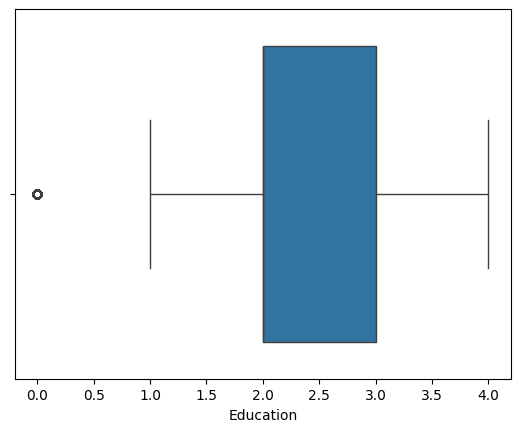

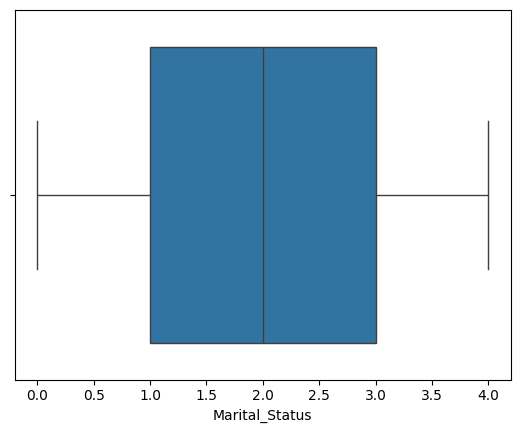

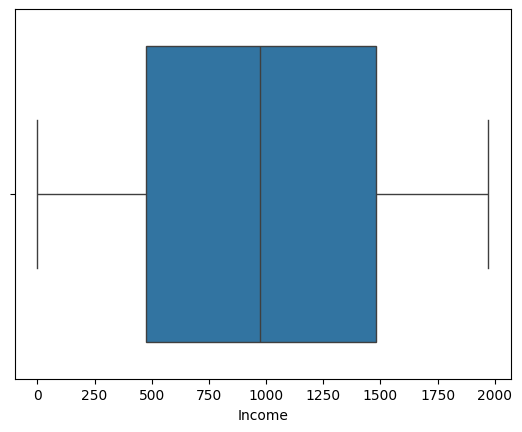

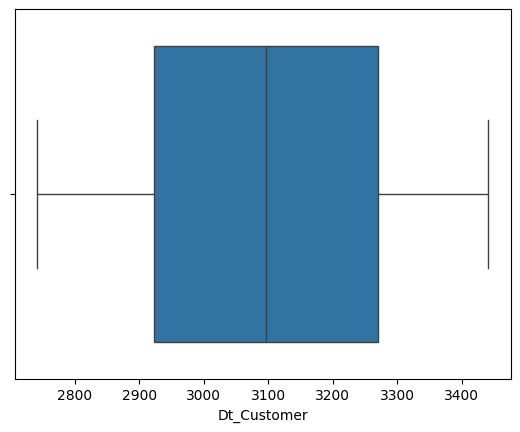

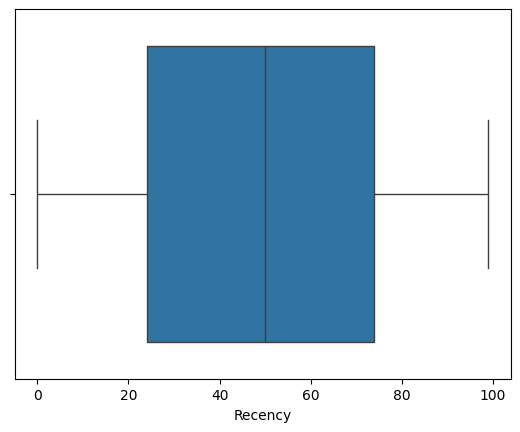

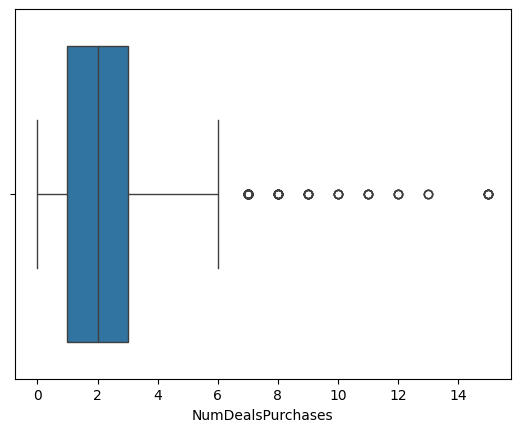

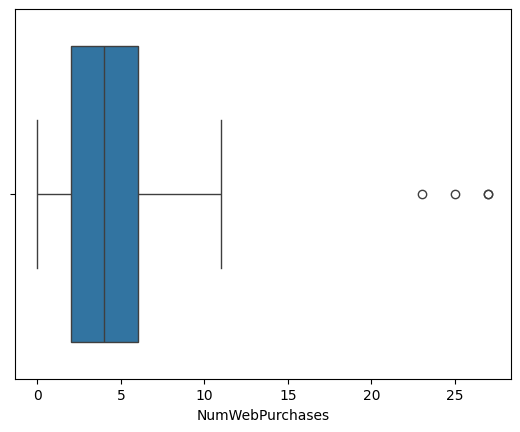

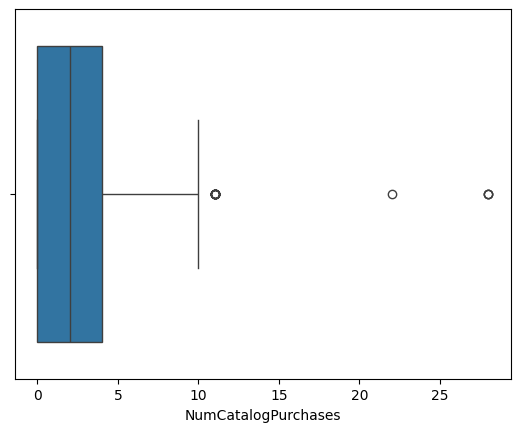

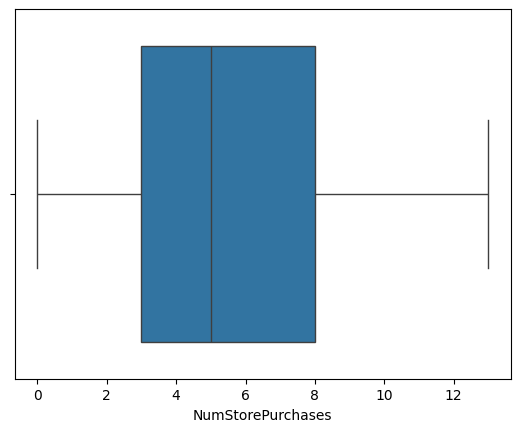

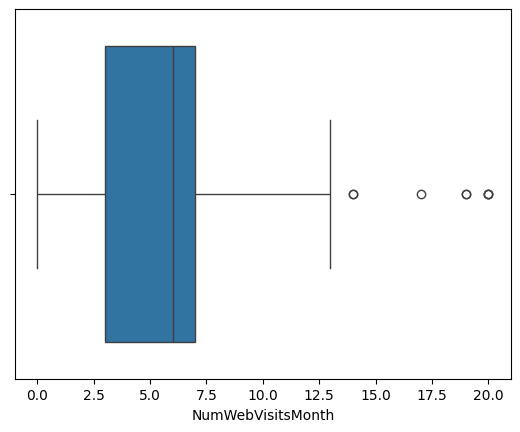

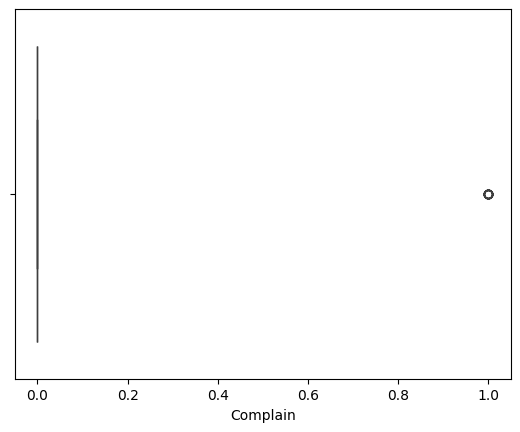

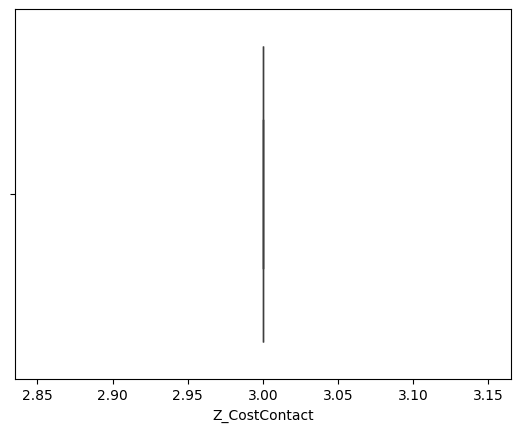

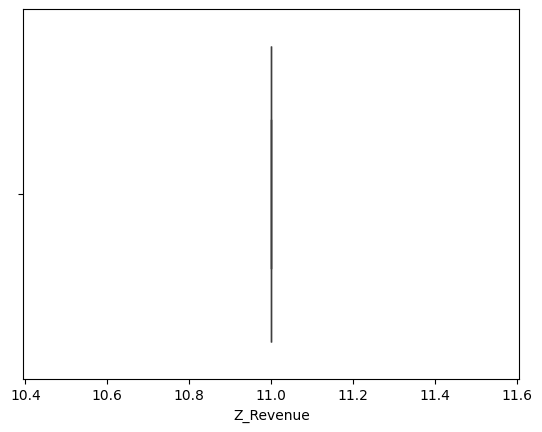

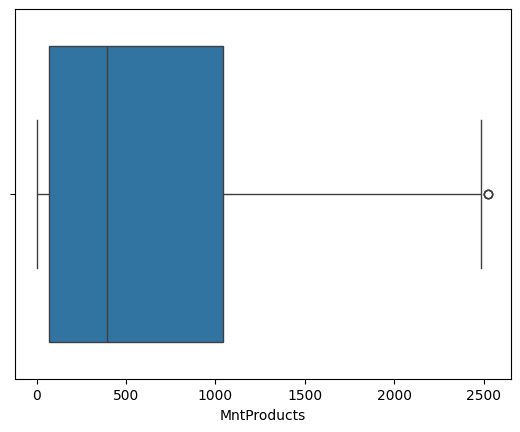

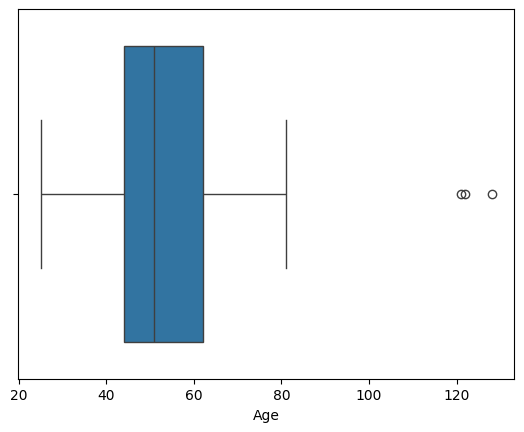

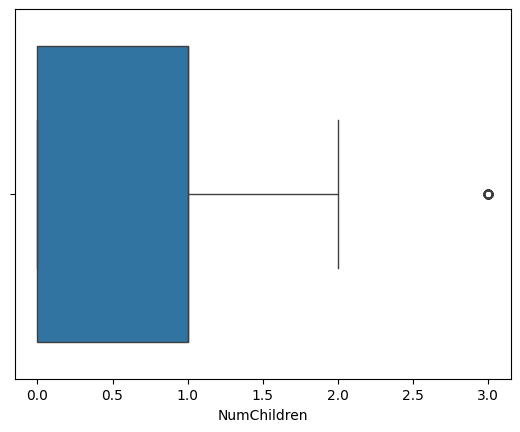

In [ ]:
# EDA (Exploratory Dats Analysis) / Handling Outliers
import matplotlib.pyplot as plt

dfNewFeatures.select_dtypes(include='number').describe()

# Viewing different features with plots to explore outliers
# Removing outliers without a good justification would be an auto-reject if I were your reviewer

for column in dfNewFeatures.columns:
  sns.boxplot(x=dfNewFeatures[column])
  plt.show()



In [ ]:
#Further analyze Z_CostContact & Z_Revenue to explore why their box plot looks unique
print(dfNewFeatures['Z_CostContact'].value_counts())
print(dfNewFeatures['Z_Revenue'].value_counts())

Z_CostContact
3    2233
Name: count, dtype: int64
Z_Revenue
11    2233
Name: count, dtype: int64


In [ ]:
#Dropping Z_CostContact & Z_Revenue because all their values for each column of the dataframe are the same
dfNewFeatures.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

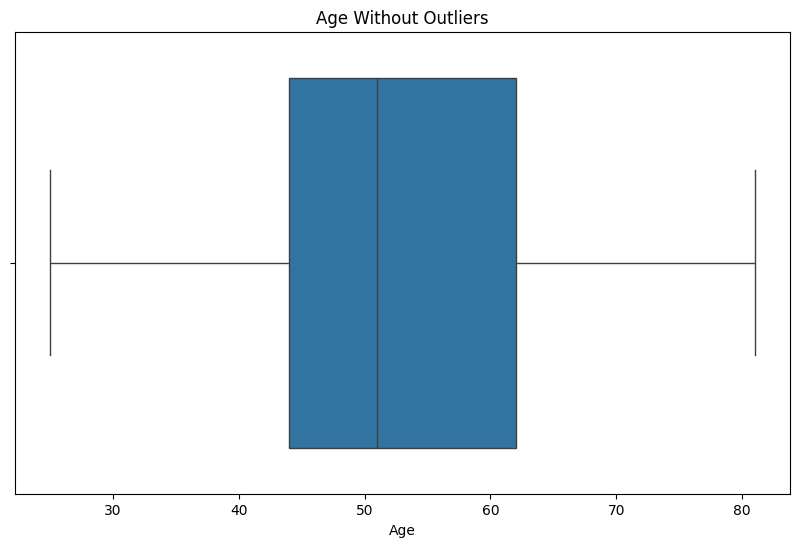

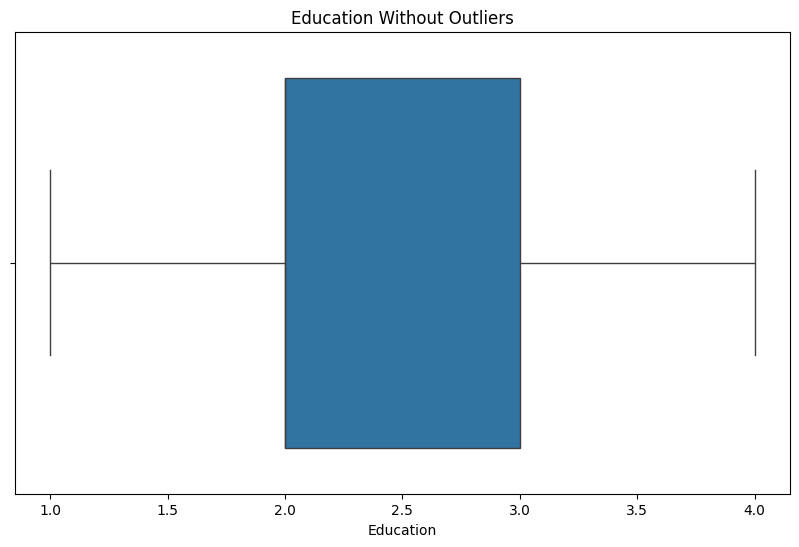

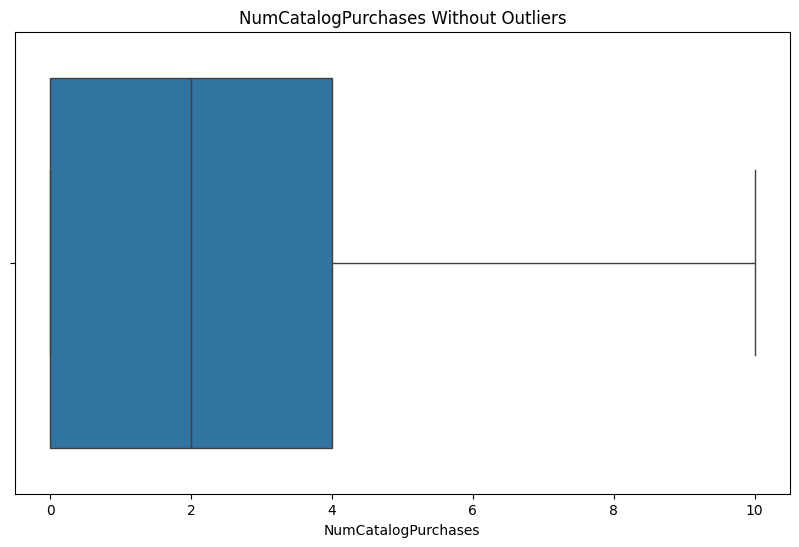

In [ ]:
#Finding upper and lower limits using IQR Method
Q1 = dfNewFeatures['Age'].quantile(0.25)
Q3 = dfNewFeatures['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
dfNewFeatures = dfNewFeatures.loc[((dfNewFeatures['Age'] >= lower_limit) & (dfNewFeatures['Age'] <= upper_limit))]

plt.figure(figsize=(10,6))
sns.boxplot(x=dfNewFeatures['Age'])
plt.title('Age Without Outliers')
plt.show()


Q1 = dfNewFeatures['Education'].quantile(0.25)
Q3 = dfNewFeatures['Education'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
dfNewFeatures = dfNewFeatures.loc[((dfNewFeatures['Education'] >= lower_limit) & (dfNewFeatures['Education'] <= upper_limit))]

plt.figure(figsize=(10,6))
sns.boxplot(x=dfNewFeatures['Education'])
plt.title('Education Without Outliers')
plt.show()


Q1 = dfNewFeatures['NumCatalogPurchases'].quantile(0.25)
Q3 = dfNewFeatures['NumCatalogPurchases'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
dfNewFeatures = dfNewFeatures.loc[((dfNewFeatures['NumCatalogPurchases'] >= lower_limit) & (dfNewFeatures['NumCatalogPurchases'] <= upper_limit))]

plt.figure(figsize=(10,6))
sns.boxplot(x=dfNewFeatures['NumCatalogPurchases'])
plt.title('NumCatalogPurchases Without Outliers')
plt.show()



#potential outliers you might wanna eliminate:
#NumCatalogPurchases
#NumWebPurchases
#NumWebVisitsMonth

In [ ]:
dfNewFeatures.describe()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntProducts,Age,NumChildren
count,2006.000000,2006.000000,2006.000000,2006.000000,2006.00000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000
mean,2.630608,1.734796,980.740279,3095.017448,49.21336,2.318046,4.118146,2.568295,5.823529,5.339482,0.008475,606.478066,52.471087,0.965105
std,0.873346,1.061902,568.974391,201.341558,28.84011,1.871840,2.779960,2.628460,3.262079,2.427997,0.091689,601.907233,11.677201,0.752571
min,1.000000,0.000000,0.000000,2742.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,25.000000,0.000000
25%,2.000000,1.000000,492.250000,2923.000000,24.00000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,69.000000,44.000000,0.000000
50%,2.000000,2.000000,979.500000,3098.500000,50.00000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,397.000000,51.000000,1.000000
75%,3.000000,3.000000,1474.500000,3270.000000,74.00000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1038.750000,62.000000,1.000000
max,4.000000,4.000000,1972.000000,3441.000000,99.00000,15.000000,27.000000,10.000000,13.000000,20.000000,1.000000,2525.000000,81.000000,3.000000


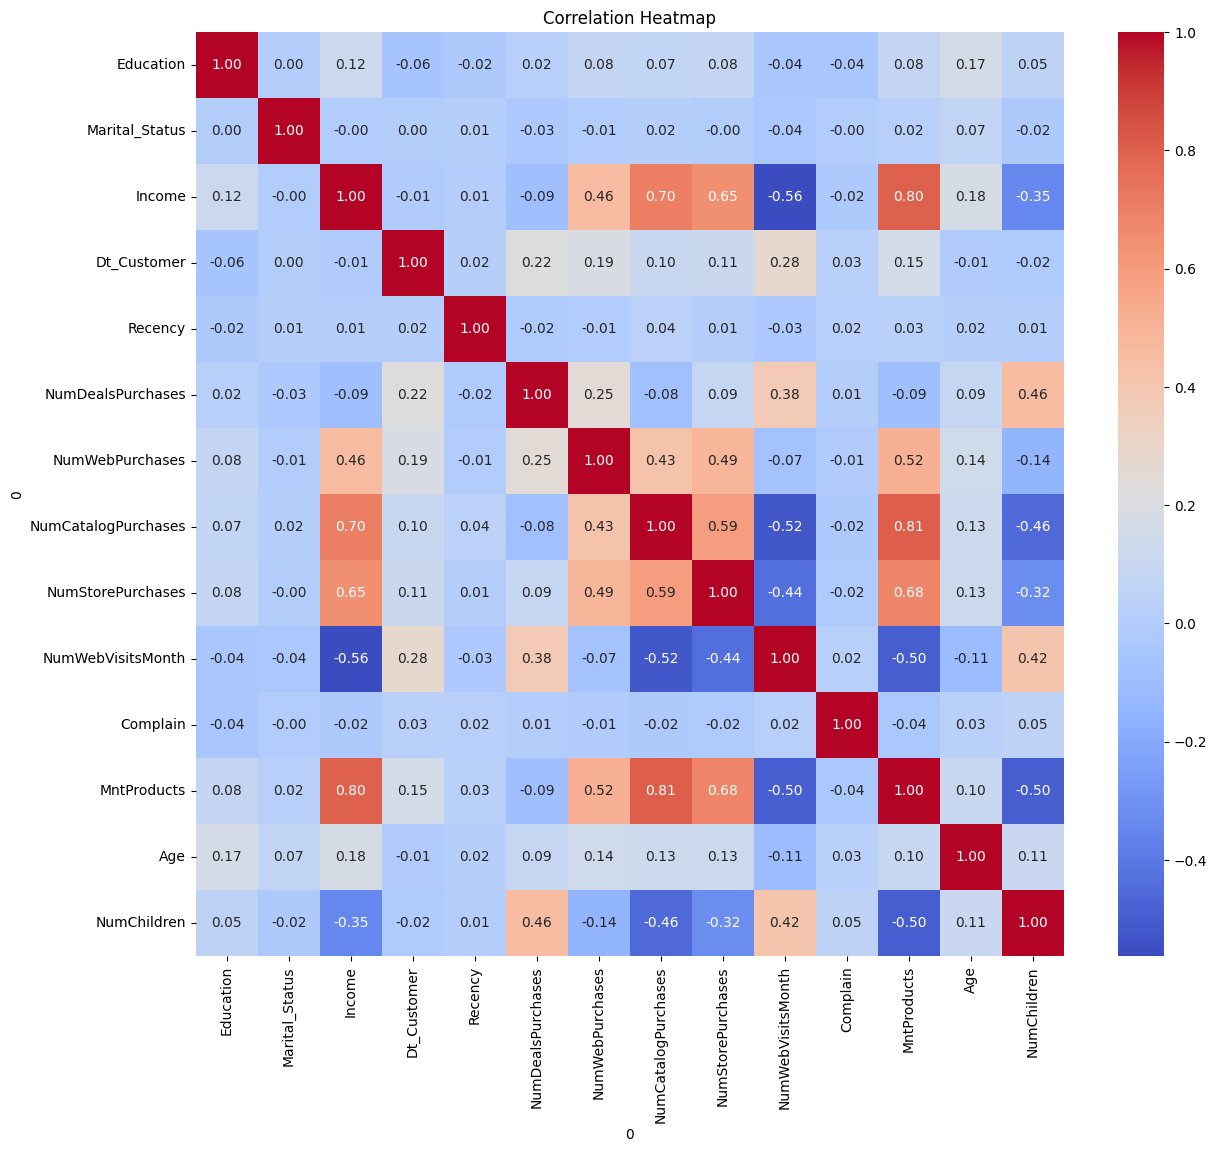

In [ ]:
# Analyzing feature correlations using a heatmap
corr_matrix = dfNewFeatures.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# 2 How are we gonna normalize the data (We will normalize the data using stadardization)
from sklearn import preprocessing


from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()  #might have to omit these
df_zscore = pd.DataFrame(iris['data'], columns = iris['feature_names'])  #might have to omit these

# results in a numpy array of as many features as you input
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(dfNewFeatures), columns=dfNewFeatures.columns)
df_zscore.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntProducts,Age,NumChildren
0,-0.722240,0.249807,0.337990,1.539969,0.304743,0.364414,1.396719,2.828104,-0.559148,0.684075,-0.09245,1.679285,0.987547,-1.28273
1,-0.722240,0.249807,-0.261483,-1.192388,-0.388908,-0.169953,-1.121931,-0.596808,-1.172406,-0.139854,-0.09245,-0.962977,1.244522,1.37549
2,-0.722240,1.191748,1.041185,-0.203772,-0.805099,-0.704320,1.396719,-0.216262,1.280629,-0.551819,-0.09245,0.281712,0.302281,-1.28273
3,-0.722240,1.191748,-1.305727,-1.063222,-0.805099,-0.169953,-0.762124,-0.977354,-0.559148,0.272110,-0.09245,-0.919770,-1.325227,0.04638
4,1.568374,-0.692134,0.343264,-0.953928,1.553316,1.433148,0.317297,0.164283,0.054111,-0.139854,-0.09245,-0.306566,-1.068252,0.04638


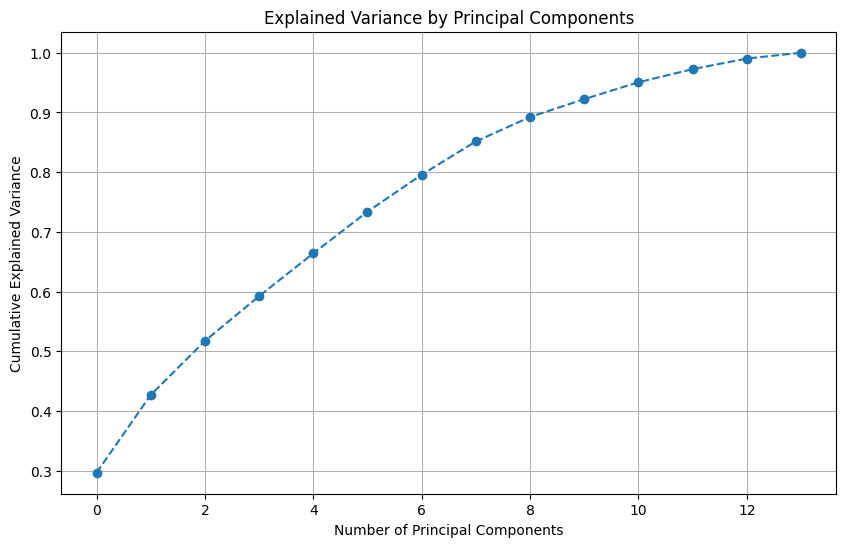

[0.29659331 0.42684995 0.51723264 0.59234421 0.6639485  0.73378836
 0.79572473 0.85148536 0.89239007 0.9222962  0.95055026 0.97253467
 0.99024463 1.        ]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Determining the right ammount of PCA components/columns for our PCA Dimensionality reduction
# Fit PCA without specifying the number of components
pca = PCA()
pca.fit(df_zscore)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Print the cumulative explained variance for reference
# CHOOSE/DETERMINE the point at which the cumulative explained variance reaches 95% this is a common and practical rule in PCA
print(cumulative_explained_variance)


In [ ]:
#Dimensionality Reduction to improve clustering
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_zscore)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])


explained_variance = pca.explained_variance_ratio_
print('Explained Varience Ration:', explained_variance)

Explained Varience Ration: [0.29659331 0.13025665 0.09038268 0.07511158 0.07160429 0.06983985
 0.06193638 0.05576062 0.04090471 0.02990613]


In [ ]:
# Create a DataFrame for principal components to see how much a feature contributes to a principle component/ importance of each feature for each principal component
principalDf = pd.DataFrame(data = principalComponents, columns = [f'PC{i+1}' for i in range(10)])

# Get the component loadings
components_df = pd.DataFrame(pca.components_, columns=df_zscore.columns, index=[f'PC{i+1}' for i in range(10)])

# Print the component loadings
print("Component Loadings:")
print(components_df)


# Some takeaways from out new PC features:
# PC1: Since Income, NumCatalogPurchases, and MntProducts have high loadings, PC1 might be associated with financial behavior or spending patterns.
# PC2: High loadings on Dt_Customer, NumDealsPurchases, NumWebVisitsMonth suggest that PC2 might relate to customer engagement or interaction over time.
# PC3: Seems to represent a combination of demographic factors, with a strong emphasis on Education and Age. It might reflect aspects of a person’s educational background and age, where individuals with higher education and older age have higher scores on PC3
# PC4: associated with Recency, Marital_Status, and Complain. Higher values of PC4 are linked to recent interactions or changes, recent complaints, and variations in marital status  PC4 might represent a combination of recent activities or changes and the propensity to complain.

Component Loadings:
0     Education  Marital_Status    Income  Dt_Customer   Recency  \
PC1   -0.057468       -0.012346 -0.428183    -0.030662 -0.013454   
PC2    0.091081       -0.027314  0.033710     0.394805 -0.009744   
PC3    0.541129        0.146234  0.094109    -0.458483 -0.023779   
PC4   -0.232922        0.465507 -0.020834     0.098236  0.594563   
PC5   -0.007777       -0.784114  0.069829    -0.189861  0.122193   
PC6   -0.085000        0.255575  0.000124     0.029553 -0.781182   
PC7    0.718931       -0.059069 -0.102260     0.458661  0.077787   
PC8    0.328773        0.276049  0.052860    -0.364039  0.096207   
PC9   -0.053344       -0.007785 -0.125565    -0.356529  0.056330   
PC10  -0.055752        0.013095  0.342432     0.075330 -0.034308   

0     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
PC1            0.079095        -0.275706            -0.425188   
PC2            0.605172         0.398223             0.024798   
PC3            0.038809        -0.05

<Axes: >

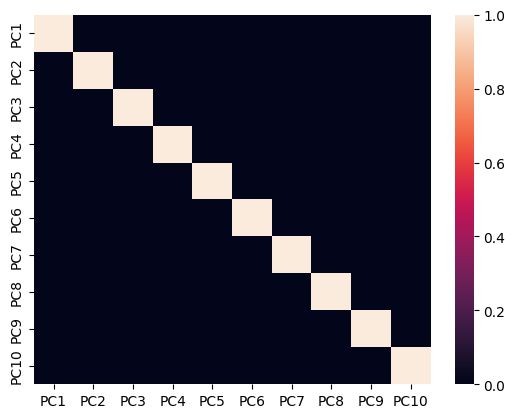

In [ ]:
#seeing if our dimensionality reduction helped elimiate the owrry of multicollinearity among our features
sns.heatmap(principalDf.corr())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

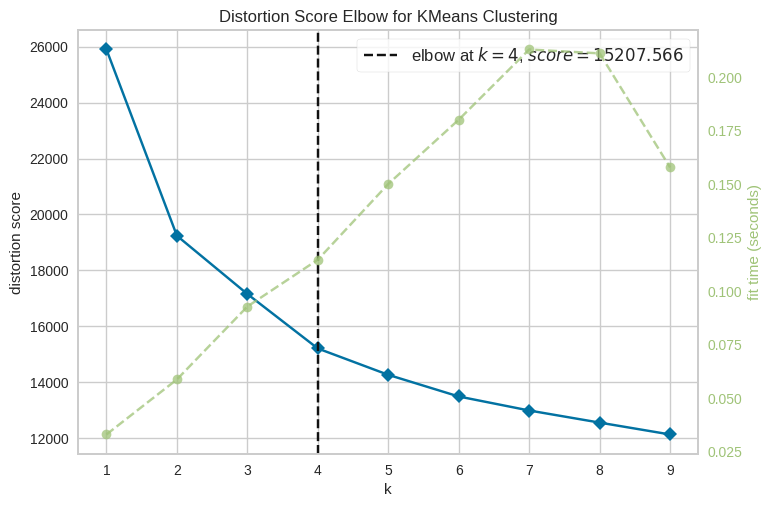

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Elbow Plot
from yellowbrick.cluster import KElbowVisualizer

# Ensure you pass a KMeans instance to the Elbow Visualizer
kmeans = KMeans(random_state=1)  # Initialize KMeans without specifying n_clusters
elbow_visualizer = KElbowVisualizer(kmeans, k=(1, 10))  # Define the range of k
elbow_visualizer.fit(principalDf)
elbow_visualizer.show()


In [ ]:
# Final KMeans model (We will use elbow plot results)
kmeans = KMeans(4, random_state=1, n_init='auto').fit(principalDf)

# Add assigned cluster to a new df
df_cluster = principalDf.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
0,-2.485493,1.390918,-1.314767,0.707474,-0.741448,-0.053097,0.555232,-1.414424,0.775251,0.972628,2
1,1.865740,-0.726752,1.513613,0.269429,0.041667,0.347778,-1.339705,-0.878642,-0.328825,0.654436,0
2,-1.945708,-0.357036,-0.244912,0.128721,-1.055214,1.077276,-0.678195,-0.058478,1.184093,-0.574859,3
3,2.087994,-1.272691,-0.451601,-0.139366,-0.972700,0.840536,-0.806110,1.090228,0.193358,-0.392675,0
4,-0.089063,0.533609,0.672140,-0.210250,0.962628,-1.717620,0.357995,1.979611,0.016616,-0.430183,2


In [ ]:
# Initialize the DataFrame
output_df = pd.DataFrame()

# Add means for each cluster
for i in range(4):
    output_df[f'C{i}_means'] = df_cluster[df_cluster.cluster == i].mean()

# Calculate differences
output_df['diff'] = output_df.apply(lambda row: row.max() - row.min(), axis=1)

# Drop cluster column and sort
output_df = output_df.drop(columns='cluster', errors='ignore')  # Just in case there's a 'cluster' column
output_df = output_df.sort_values(by=['diff'], ascending=False)

output_df

,C0_means,C1_means,C2_means,C3_means,diff
PC1,1.817775,0.934699,-1.296645,-2.742658,4.560434
PC2,-0.614355,2.110064,0.944171,-0.961407,3.071471
cluster,0.000000,1.000000,2.000000,3.000000,3.000000
PC9,0.006911,-0.273200,0.318719,-0.195527,0.591920
PC7,0.086750,-0.317974,-0.007197,0.014496,0.404723
PC8,-0.065668,0.241347,-0.032580,0.028603,0.307014
PC4,0.040772,-0.206572,-0.055325,0.093319,0.299891
PC3,-0.001697,0.121658,0.018786,-0.084437,0.206095
PC10,0.004216,-0.073200,-0.009665,0.042788,0.115988
PC5,-0.019250,-0.022800,0.078514,-0.031776,0.110290


In [ ]:
# Example DataFrame of component loadings
components_df = pd.DataFrame({
    'PC1': [-0.057468, -0.012346, -0.428183, -0.030662, -0.013454, -0.057468, -0.012346, -0.428183, -0.030662, -0.013454],
    'PC2': [0.091081, -0.027314, 0.033710, 0.394805, -0.009744, 0.091081, -0.027314, 0.033710, 0.394805, -0.009744],
    'PC3': [0.541129, 0.146234, 0.094109, -0.458483, -0.023779, 0.541129, 0.146234, 0.094109, -0.458483, -0.023779],
    'PC4': [-0.232922, 0.465507, -0.020834, 0.098236, 0.594563, -0.232922, 0.465507, -0.020834, 0.098236, 0.594563],
    # Add other PCs as needed
}, index=['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
          'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
          'NumStorePurchases', 'NumWebVisitsMonth'])

# Verify the DataFrame
print(components_df)


                          PC1       PC2       PC3       PC4
Education           -0.057468  0.091081  0.541129 -0.232922
Marital_Status      -0.012346 -0.027314  0.146234  0.465507
Income              -0.428183  0.033710  0.094109 -0.020834
Dt_Customer         -0.030662  0.394805 -0.458483  0.098236
Recency             -0.013454 -0.009744 -0.023779  0.594563
NumDealsPurchases   -0.057468  0.091081  0.541129 -0.232922
NumWebPurchases     -0.012346 -0.027314  0.146234  0.465507
NumCatalogPurchases -0.428183  0.033710  0.094109 -0.020834
NumStorePurchases   -0.030662  0.394805 -0.458483  0.098236
NumWebVisitsMonth   -0.013454 -0.009744 -0.023779  0.594563


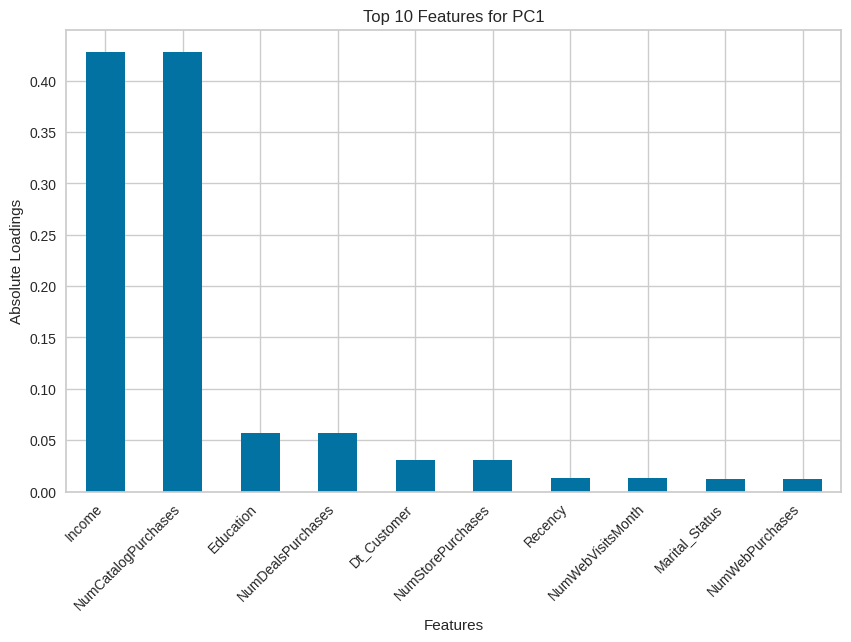

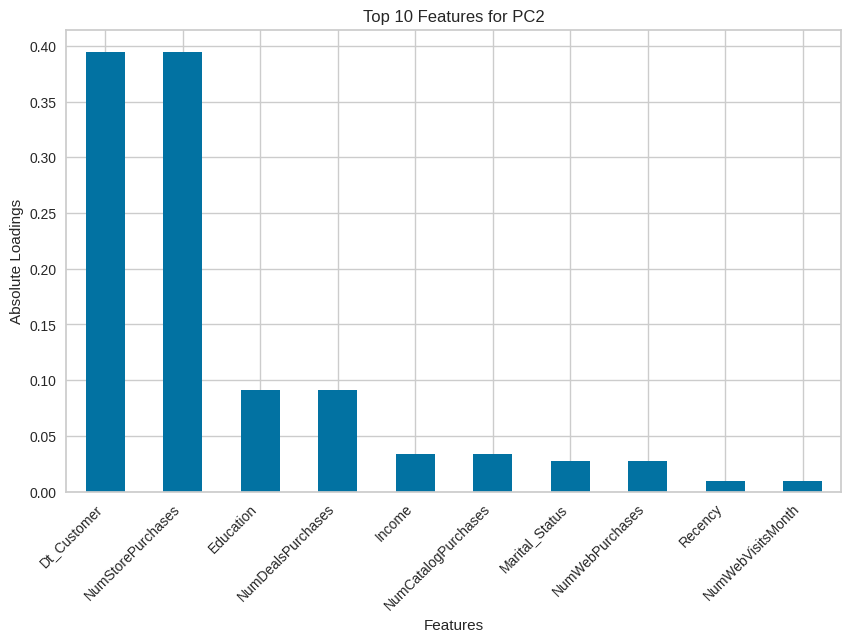

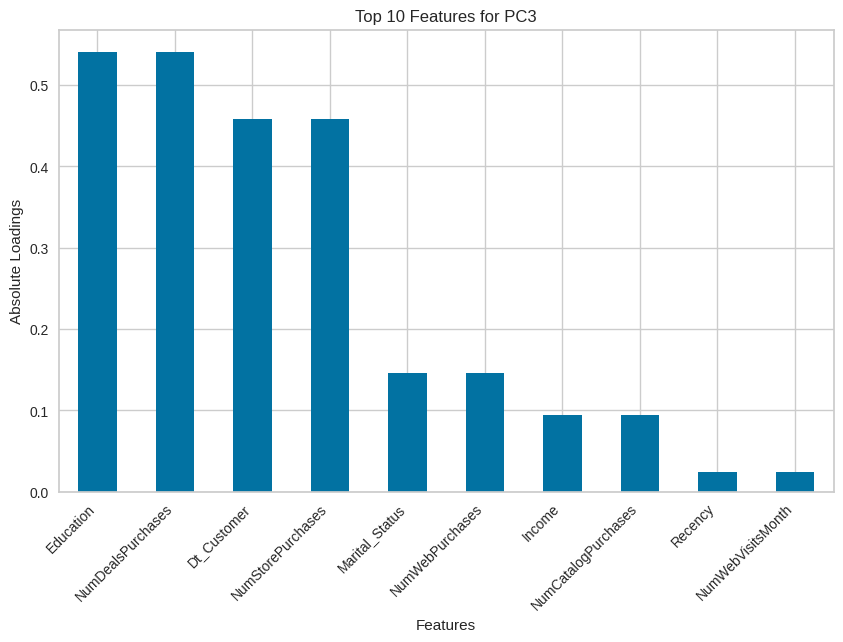

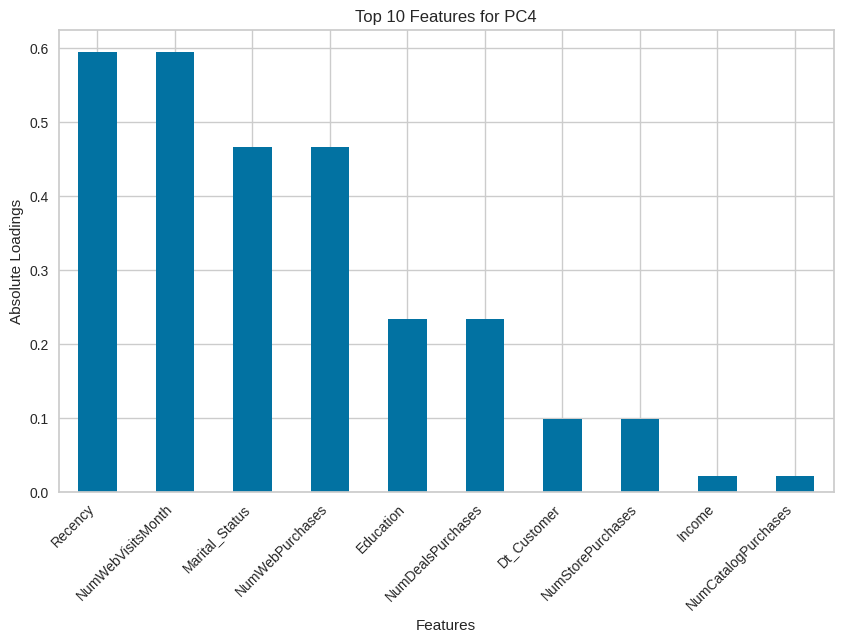

In [ ]:
# Function to rank and plot top features for each PC
def rank_and_plot_features(components_df, pc_name, top_n=10):
    if pc_name in components_df.columns:
        top_features = components_df[pc_name].abs().sort_values(ascending=False).head(top_n)
        plt.figure(figsize=(10, 6))
        top_features.plot(kind='bar')
        plt.title(f"Top {top_n} Features for {pc_name}")
        plt.xlabel('Features')
        plt.ylabel('Absolute Loadings')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print(f"{pc_name} is not in the DataFrame columns")

# Plot top features for each PC
for pc in components_df.columns:
    rank_and_plot_features(components_df, pc)

# Interpretations:
# PC1 seems to capture financial behavior, with lower scores linked to higher income and more catalog purchases. This could imply that clusters with higher values on PC1 may have lower income and more catalog-based shopping behavior.
# PC2 appears to be related to customer engagement or interaction over time, with higher scores associated with newer customers and those making more store purchases. Clusters with higher PC2 scores may reflect more recent or engaged customers.
# PC3 likely represents demographic factors, such as educational background. Higher scores on PC3 are associated with higher education and more deal purchases. Clusters with higher PC3 scores might consist of individuals with higher education and more frequent deal-based purchases.
# PC4 seems to capture recent activity and complaints, with higher scores linked to recent interactions and variations in marital status. Clusters with higher PC4 scores might show recent activity and more variation in marital status.

In [ ]:
#3d visualization to view clusters
fig = px.scatter_3d(df_cluster, x='PC1', y='PC2', z='PC3', color='cluster', size_max=20, opacity=1.0)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<Axes: xlabel='cluster'>

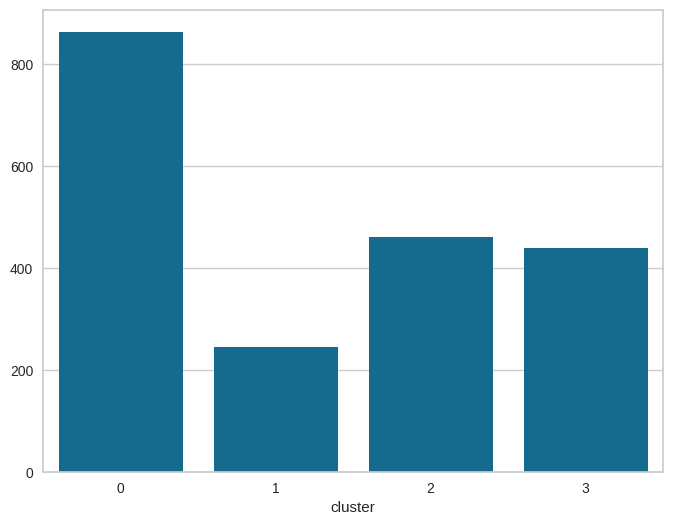

In [ ]:
# Create a bar plot for the number of customers in each cluster
cluster_counts = df_cluster['cluster'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)

#from these results we can see that most customers fall into cluster 0, which could be combined with marketing efforts to target


<Axes: xlabel='PC1', ylabel='PC2'>

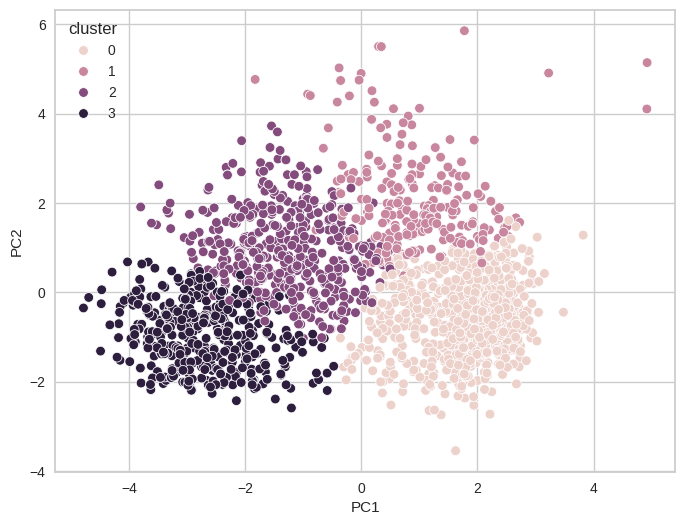

In [ ]:
# Create a scatter plot for the number of customers in each cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_cluster)


In [ ]:
import pandas as pd
import numpy as np

# Example Principal Component Scores (substitute with your actual data)
principalComponents = np.array([
    [1.817775, 0.934699, -1.296645, -2.742658],
    [-0.614355, 2.110064, 0.944171, -0.961407],
    [0.006911, -0.273200, 0.318719, -0.195527],
    [0.086750, -0.317974, -0.007197, 0.014496],
    [-0.065668, 0.241347, -0.032580, 0.028603],
    [0.040772, -0.206572, -0.055325, 0.093319],
    [-0.001697, 0.121658, 0.018786, -0.084437],
    [0.004216, -0.073200, -0.009665, 0.042788],
    [-0.019250, -0.022800, 0.078514, -0.031776],
    [-0.015849, -0.010099, -0.018483, 0.056287]
])

# Example Cluster Labels (substitute with your actual cluster labels)
cluster_labels = np.array([0, 1, 2, 3, 1, 2, 0, 3, 1, 2])

# Create DataFrame for PC scores and cluster labels
pc_scores_df = pd.DataFrame(principalComponents, columns=[f'PC{i+1}' for i in range(principalComponents.shape[1])])
cluster_df = pd.Series(cluster_labels, name='Cluster')

# Combine PC scores with cluster labels
combined_df = pd.concat([pc_scores_df, cluster_df], axis=1)

# Calculate average PC scores per cluster
average_pc_scores = combined_df.groupby('Cluster').mean()

# Calculate correlation of each PC with cluster labels
# Convert cluster labels to numeric if they are not already
combined_df['Cluster'] = combined_df['Cluster'].astype(float)
correlations = combined_df.corr()['Cluster'].drop('Cluster')

# Print average PC scores and correlations
print("Average PC Scores per Cluster:")
print(average_pc_scores)

print("\nCorrelation of PCs with Clusters:")
print(correlations)

# Interpretation:
# Cluster 0 has high positive scores in PC1 and PC2 but low in PC3 and PC4. This suggests that Cluster 0 is characterized by features associated with PC1 and PC2 and less influenced by PC3 and PC4.
# Cluster 1 has high positive scores in PC2 and moderate positive scores in PC3. It suggests that Cluster 1 is influenced strongly by features associated with PC2.
# Cluster 2 has nearly zero scores for all PCs, indicating that it is not strongly characterized by any specific principal component.
# Cluster 3 also has near-zero scores across all PCs, suggesting that it is not strongly defined by any particular principal component.

Average PC Scores per Cluster:
              PC1       PC2       PC3       PC4
Cluster                                        
0        0.908039  0.528178 -0.638930 -1.413547
1       -0.233091  0.776204  0.330035 -0.321527
2        0.010611 -0.163290  0.081637 -0.015307
3        0.045483 -0.195587 -0.008431  0.028642

Correlation of PCs with Clusters:
PC1   -0.364360
PC2   -0.494333
PC3    0.286058
PC4    0.555134
Name: Cluster, dtype: float64
